In [1]:
#SVM

In [2]:
import numpy as np

In [3]:
class SVM:
    def init_args(self, max_iter, features, labels):
        self.max_iter = max_iter
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0
        self.alpha = np.ones(self.m)
        self.E = [self.calc_E(i) for i in range(self.m)]
        self.C = 1.0

    # 核函数，这里选用线性核
    def kernel(self, x1, x2):
        sum = 0
        for i in range(self.n):
            sum += x1[i]*x2[i]
        return sum

    # 计算预测值
    def calc_g(self, i):
        g = self.b
        for j in range(self.m):
            g += self.alpha[j]*self.Y[j]*self.kernel(self.X[i], self.X[j])
        return g

    # 计算预测值与真实值的差值
    def calc_E(self, i):
        return self.calc_g(i) - self.Y[i]

    # 判断是否满足KKT条件
    def judge_KKT(self, i):
        if self.alpha[i]==0 and self.Y[i]*self.calc_g(i)>=1:
            return True
        elif 0<self.alpha[i]<self.C and self.Y[i]*self.calc_g(i)==1:
            return True
        return False

    def get_alpha(self):
        # 外层循环，找第一个变量，遍历样本点，找到第一个不满足KKT条件的
        for i in range(self.m):
            if self.judge_KKT(i) == False:
                # 内层循环，找第二个变量
                E1 = self.E[i]
                if E1 >= 0:
                    j = min(range(self.m), key=lambda index : self.E[index])
                else:
                    j = max(range(self.m), key=lambda index : self.E[index])
                return i, j

    def train(self, max_iter, features, labels):
        # 迭代训练
        self.init_args(max_iter, features, labels)
        for i in range(self.max_iter):
            # 选择 alpha1和alpha1
            i1, i2 = self.get_alpha()

            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i2]+self.alpha[i1]-self.C)
                H = min(self.C, self.alpha[i2]+self.alpha[i1])
            else:
                L = max(0, self.alpha[i2]-self.alpha[i1])
                H = min(self.C, self.alpha[i2]+self.alpha[i1]+self.C)
            
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(self.X[i2], self.X[i2]) - 2*self.kernel(self.X[i1], self.X[i2])
            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (self.E[i1] - self.E[i2]) / eta
            
            if alpha2_new_unc > H:
                alpha2_new = H
            elif L <= alpha2_new_unc <= H:
                alpha2_new = alpha2_new_unc
            elif alpha2_new_unc < L:
                alpha2_new = L
            
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (self.alpha[i2] - alpha2_new)
            
            b1_new = -self.E[i1] - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (alpha1_new-self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i1]) * (alpha2_new-self.alpha[i2])+ self.b 
            b2_new = -self.E[i2] - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (alpha1_new-self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i2]) * (alpha2_new-self.alpha[i2])+ self.b 

            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                b_new = (b1_new + b2_new) / 2
                
            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new
            
            self.E[i1] = self.calc_E(i1)
            self.E[i2] = self.calc_E(i2)
        print("Train: {0} iterations have been done.".format(self.max_iter))


In [4]:
#1.数据生成
import matplotlib.pyplot as plt
x=[[1,2,3,4],[1,2,3,4]]
y=[2,4,6,8]

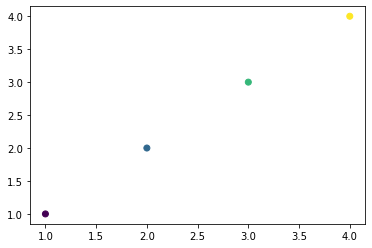

In [5]:
#2.可视化
plt.scatter(x[:][0],x[:][1],c=y)
plt.show()

In [6]:
svm=SVM()
x=np.array(x)
y=np.array(y)
svm.train(1000,x,y)
svm.calc_g(1)

Train: 1000 iterations have been done.


E:\Anaconda\envs\mindspore\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in double_scalars


3.0